<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL: str = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
# Remove the unnamed column
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:


## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

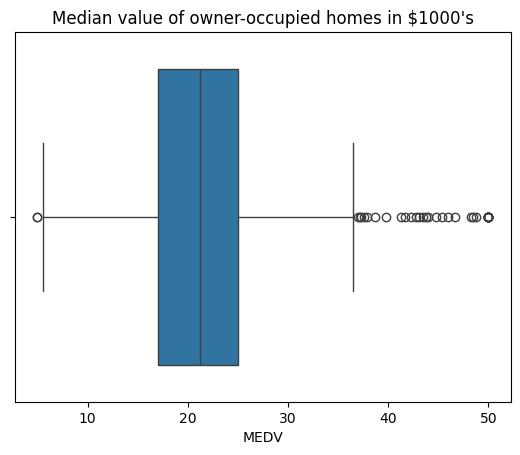

In [7]:
sns.boxplot(x=boston_df["MEDV"])\
    .set_title("Median value of owner-occupied homes in $1000's")

## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Bar plot Charles river variable')

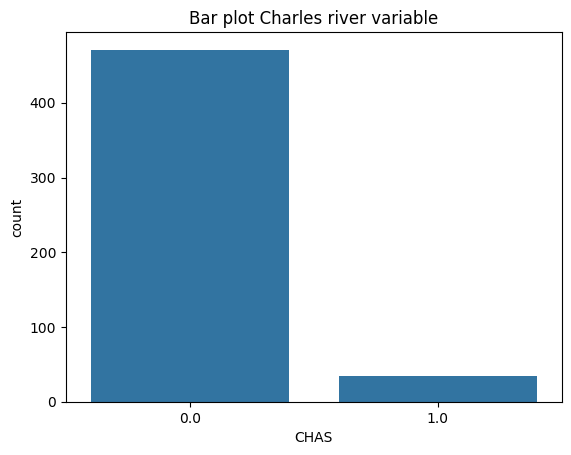

In [8]:
chas_values = boston_df['CHAS'].value_counts()
sns.barplot(x=chas_values.index, y=chas_values)\
    .set_title('Bar plot Charles river variable')

## Provide a boxplot for the MEDV variable vs the AGE variable. 
Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


Text(0.5, 1.0, 'MEDV vs AGE')

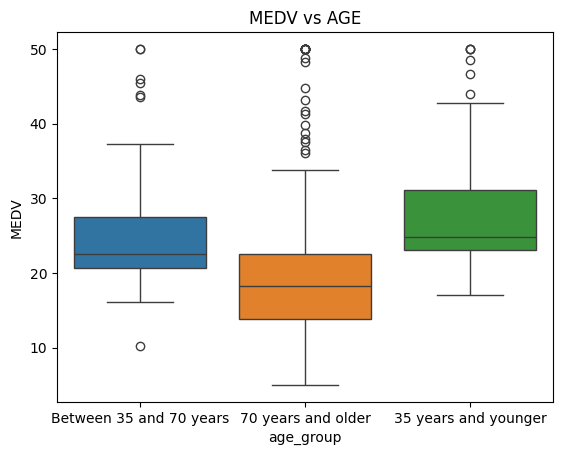

In [10]:
sns.boxplot(x=boston_df['age_group'],
            y=boston_df['MEDV'],
            hue=boston_df['age_group'])\
    .set_title('MEDV vs AGE')

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
What can you say about the relationship?

Text(0.5, 1.0, 'Relationship Nitric oxide concentrations and Non-retail business acres per town')

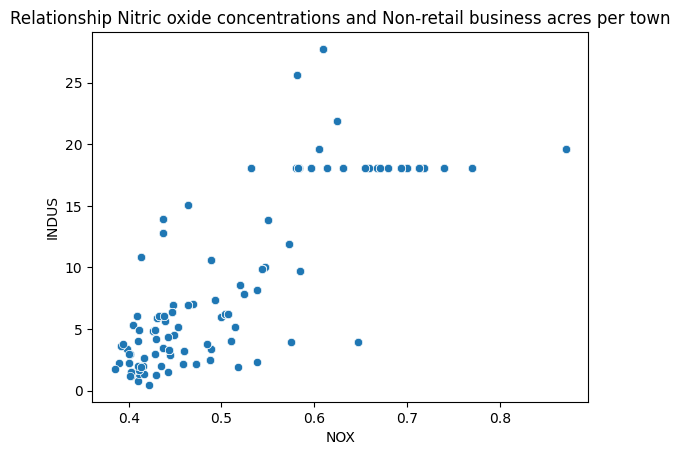

In [11]:
sns.scatterplot(x=boston_df['NOX'],
            y=boston_df['INDUS'])\
    .set_title('Relationship Nitric oxide concentrations and Non-retail business acres per town')

We can see a clear correlation between the nitric oxide concentration and the non-retail business acres per town

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram Pupil to Teacher Ratio')

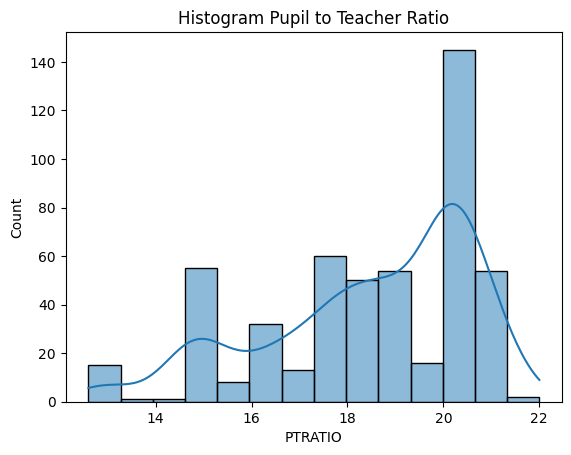

In [12]:
sns.histplot(x=boston_df['PTRATIO'],
            kde=True)\
    .set_title('Histogram Pupil to Teacher Ratio')

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test


## Is there a significant difference in median value of houses bounded by the Charles river or not?
(T-test for independent samples)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group (Charles river variable)
*   One dependent continuous variable (Median value of houses)
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses if they are close to Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses if they are close to Charles river or not")


Text(0.5, 1.0, 'Histogram Median value of houses')

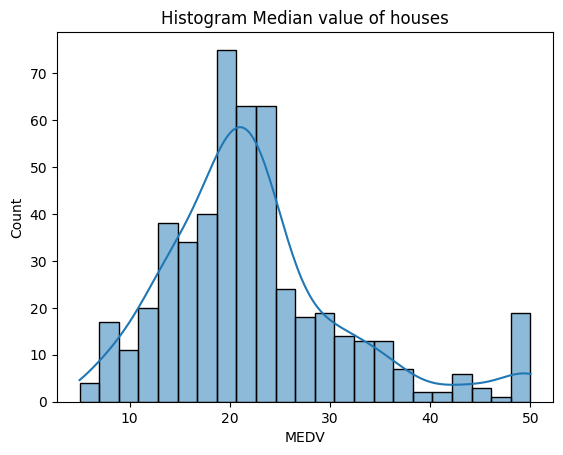

In [13]:
# We will check that the continuous variable follows a Normal distribution
sns.histplot(x=boston_df['MEDV'],
             kde=True)\
    .set_title('Histogram Median value of houses')

As we can observe on the image above, the variable is following a Normal distribution

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can assume inequality of variance

Text(0.5, 1.0, 'CHAS vs MEDV')

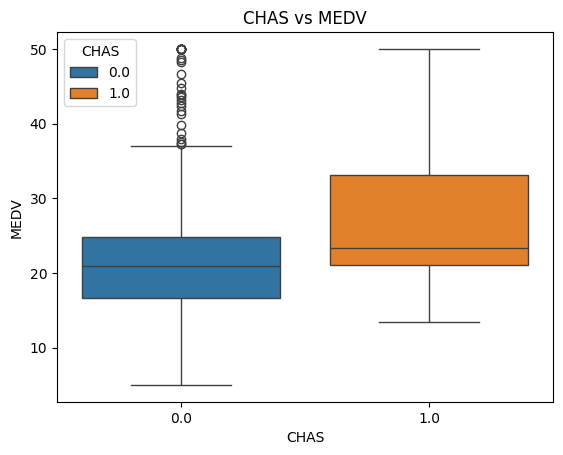

In [15]:
sns.boxplot(x=boston_df['CHAS'],
            y=boston_df['MEDV'],
            hue=boston_df['CHAS'])\
    .set_title('CHAS vs MEDV')

As we can see, the difference in the variance of the groups is evident. However, just to follow the example, we will proceeed as the assumpotion of same variance is accomplished, but in the ttest variable equal_var (Equal Variance) we will set it to False.

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                        boston_df[boston_df['CHAS'] == 1]['MEDV'],
                       equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**\
Since the p-value is less than alpha value 0.05,\ 
we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses if they are close to Charles river or not.\
Then, being closer to the Charles River affects the median value of houses (MEDV).

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
(ANOVA)

First, we group the data into categories as the one-way ANOVA can't work with continuous variable.\
So, we will use the categoric variable created 'age_group' to perform the ANOVA.\
State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three proportion means are equal)
*   $H\_1:$ At least one of the means differ

**Test for equality of variance**

In [17]:
scipy.stats.levene(boston_df.loc[boston_df['age_group']=='35 years and younger', 'MEDV'],
                    boston_df.loc[boston_df['age_group']=='Between 35 and 70 years', 'MEDV'],
                    boston_df.loc[boston_df['age_group']=='70 years and older', 'MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we cannot reject the null hypothesis, so the variance between the groups are equal and  we can move along

**ANOVA**\
Now we can run a one-way ANOVA

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df.loc[boston_df['age_group']=='35 years and younger', 'MEDV'],
                                            boston_df.loc[boston_df['age_group']=='Between 35 and 70 years', 'MEDV'],
                                            boston_df.loc[boston_df['age_group']=='70 years and older', 'MEDV'])
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**\
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.\
So, there is at least one group which the mean of the Median values of houses (MEDV) differs.\
For better understanding, we can see it in the following figure:

Text(0.5, 1.0, 'Age_group vs MEDV')

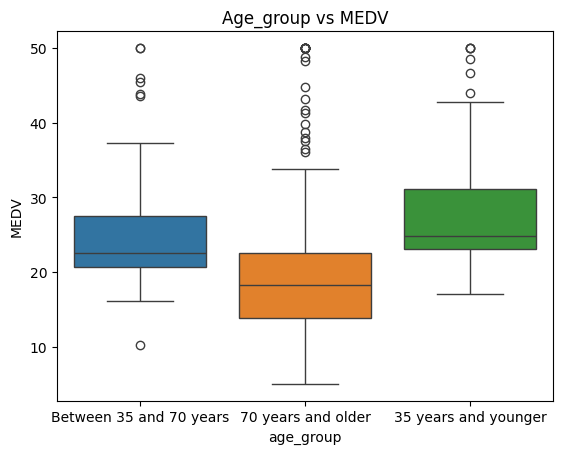

In [19]:
sns.boxplot(x=boston_df['age_group'],
            y=boston_df['MEDV'],
            hue=boston_df['age_group'])\
    .set_title('Age_group vs MEDV')

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
(Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations (named 'NOX') is not correlated to proportion of non-retail business acres per town (named 'INDUS')
*   $H\_1:$ 'NOX' is correlated with 'INDUS'

Since they are both continuous variables we can use a Pearson correlation test and draw a scatter plot

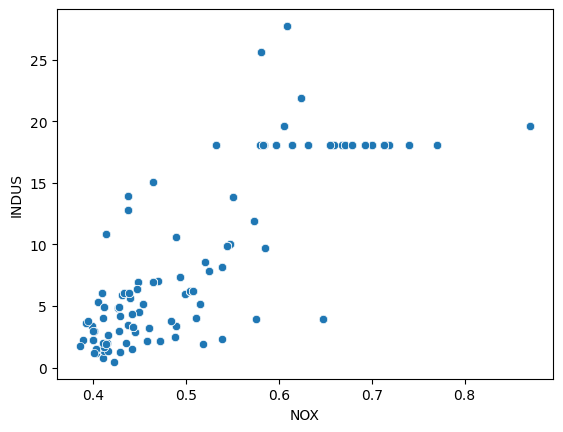

In [20]:
ax = sns.scatterplot(data=boston_df,
                     x="NOX", 
                     y="INDUS")

In [21]:
scipy.stats.pearsonr(boston_df['NOX'],
                     boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:**\
Since the p-value  (Sig. (2-tailed)  < 0.05,\
we reject  the Null hypothesis and conclude that exists a relationship between Nitric oxide concentrations ('NOX') and the proportion of non-retail business avres per town ('INDUS').

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
(Regression analysis)

To answer this question, we will perform a regression analysis on the variables:\
**DIS** - weighted distances to five Boston employment centres\
**MEDV** - Median value of owner-occupied homes in $1000's



In [22]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        14:00:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

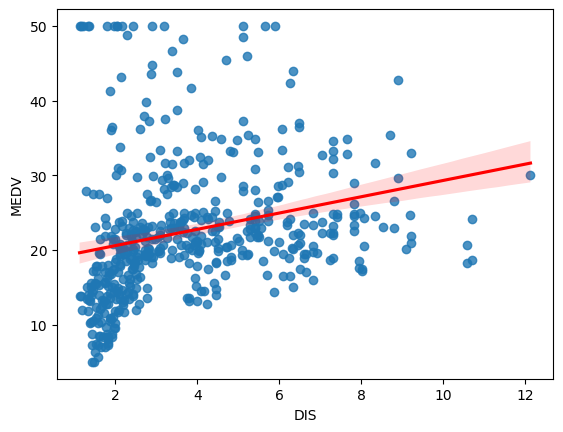

In [25]:
ax = sns.regplot(data=boston_df,
                 x="DIS", 
                 y="MEDV",
                 line_kws=dict(color="r"))

**Conclusion:**\
As we can see from the OLS Regression result, the DIS coefficient is 1.0916 (the regression slope),\
which means that for every additional unit on the weighted distance to the five Boston employment centers,\
the median value of owner occupied homes also increases that amount